# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

Python-dotenv could not parse statement starting at line 2


True

In [3]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [4]:
# Create a newsapi client
news_api = NewsApiClient(api_key = os.environ["news_api"])

In [5]:
# Fetch the Bitcoin news articles
bitcoin_headlines = news_api.get_everything( q="bitcoin", language="en", sort_by="relevancy")
bitcoin_headlines

{'status': 'ok',
 'totalResults': 3685,
 'articles': [{'source': {'id': None, 'name': 'Gizmodo.com'},
   'author': 'John Biggs',
   'title': 'Crypto Traders Cut Out the Middleman, Simply Rob Victim',
   'description': 'Two alleged crypto traders in Singapore apparently came up with a fool-proof plan: rather than convert a customer’s 365,000 Singapore dollars to bitcoin, they would simply rob the victim when he came in to do the trade.Read more...',
   'url': 'https://gizmodo.com/crypto-traders-cut-out-the-middleman-simply-rob-victim-1845011301',
   'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/li0fkkejdmaugm8v1fkw.jpg',
   'publishedAt': '2020-09-10T14:28:00Z',
   'content': 'Two alleged crypto traders in Singapore apparently came up with a fool-proof plan: rather than convert a customers 365,000 Singapore dollars to bitcoin, they would simply rob the victim when he came … [+1735 chars]'},
  {'source': {'id

In [6]:

# Fetch the Ethereum news articles
ethereum_headlines = news_api.get_everything(q="ethereum", language="en", sort_by="relevancy")
ethereum_headlines

{'status': 'ok',
 'totalResults': 1394,
 'articles': [{'source': {'id': 'mashable', 'name': 'Mashable'},
   'author': 'Stan Schroeder',
   'title': 'Crypto wallet MetaMask finally launches on iOS and Android, and it supports Apple Pay',
   'description': "If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ethereum and its ecosystem, making it easy to connect with a dece…",
   'url': 'https://mashable.com/article/metamask-ios-android/',
   'urlToImage': 'https://mondrian.mashable.com/2020%252F09%252F02%252Ffd%252Fe724b5edb4b644dba45958e17ad591e1.6b9c6.png%252F1200x630.png?signature=xIKBM112GVhTA9mUq0DRjCVGWSE=',
   'publishedAt': '2020-09-02T16:00:00Z',
   'content': "If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension t

In [7]:
# Create the Bitcoin  sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["compound", "negative", "neutral", "positive", "text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,compound,negative,neutral,positive,text
0,-0.6908,0.16,0.840,0.000,Two alleged crypto traders in Singapore appare...
1,0.0000,0.00,1.000,0.000,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ..."
2,0.2732,0.00,0.937,0.063,“The COVID-19 pandemic has resulted in a mass ...
3,0.0000,0.00,1.000,0.000,"LAGOS/LONDON (Reuters) - Four months ago, Abol..."
4,0.0000,0.00,1.000,0.000,"LAGOS/LONDON (Reuters) - Four months ago, Abol..."


In [8]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["compound", "negative", "neutral", "positive", "text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,compound,negative,neutral,positive,text
0,0.7506,0.0,0.791,0.209,If you've interacted with cryptocurrencies in ...
1,0.0000,0.0,1.000,0.000,TL;DR: The Complete Stock and Cryptocurrency I...
2,0.0000,0.0,1.000,0.000,"September\r\n18, 2020\r\n6 min read\r\nOpinion..."
3,0.7579,0.0,0.819,0.181,LONDON (Reuters) - It sounds like a surefire b...
4,0.0000,0.0,1.000,0.000,NEW YORK (Reuters) - Brooklyn-based technology...


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.371550,0.008000,0.915950,0.076050
std,0.320603,0.035777,0.046388,0.046397
min,-0.690800,0.000000,0.802000,0.000000
25%,0.448550,0.000000,0.910000,0.083250
50%,0.507000,0.000000,0.910000,0.090000
75%,0.507000,0.000000,0.910000,0.090000
max,0.750600,0.160000,1.000000,0.198000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,negative,neutral,positive
count,16.000000,16.000000,16.000000,16.000000
mean,0.190694,0.015688,0.921312,0.063062
std,0.298172,0.034763,0.085886,0.070121
min,-0.267700,0.000000,0.747000,0.000000
25%,0.000000,0.000000,0.871000,0.000000
50%,0.000000,0.000000,0.931000,0.053500
75%,0.401900,0.000000,1.000000,0.097250
max,0.757900,0.110000,1.000000,0.209000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the highest mean positive score

Q: Which coin had the highest compound score?

A: Ethereum has the highest max compound score

Q. Which coin had the highest positive score?

A: Etherreum has the highest max positive score

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
lemmatizer = WordNetLemmatizer()

In [13]:
# Expand the default stopwords list if necessary

In [14]:
#ds Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z]")
    re_clean = regex.sub(' ', text)
    words = word_tokenize(text)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in words if word.lower() not in sw]
    return tokens

In [15]:
bitcoin_df["tokens"] = bitcoin_df.text.apply(tokenizer)
bitcoin_df

,compound,negative,neutral,positive,text,tokens
0,-0.6908,0.16,0.840,0.000,Two alleged crypto traders in Singapore appare...,"[two, alleged, crypto, traders, singapore, app..."
1,0.0000,0.00,1.000,0.000,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...","[alexis, akwagyiram, ,, tom, wilson, *, monthl..."
2,0.2732,0.00,0.937,0.063,“The COVID-19 pandemic has resulted in a mass ...,"[“, covid-19, pandemic, resulted, mass, shift,..."
3,0.0000,0.00,1.000,0.000,"LAGOS/LONDON (Reuters) - Four months ago, Abol...","[lagos/london, (, reuters, ), -, four, months,..."
4,0.0000,0.00,1.000,0.000,"LAGOS/LONDON (Reuters) - Four months ago, Abol...","[lagos/london, (, reuters, ), -, four, months,..."
5,0.5070,0.00,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
6,0.5070,0.00,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
7,0.5070,0.00,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
8,0.5070,0.00,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
9,0.5070,0.00,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."


In [16]:
# Create a new tokens column for ethereum
ethereum_df["tokens"] = ethereum_df.text.apply(tokenizer)
ethereum_df

,compound,negative,neutral,positive,text,tokens
0,0.7506,0.000,0.791,0.209,If you've interacted with cryptocurrencies in ...,"['ve, interacted, cryptocurrencies, past, coup..."
1,0.0000,0.000,1.000,0.000,TL;DR: The Complete Stock and Cryptocurrency I...,"[tl, ;, dr, :, complete, stock, cryptocurrency..."
2,0.0000,0.000,1.000,0.000,"September\r\n18, 2020\r\n6 min read\r\nOpinion...","[september, 18, ,, 2020, 6, min, read, opinion..."
3,0.7579,0.000,0.819,0.181,LONDON (Reuters) - It sounds like a surefire b...,"[london, (, reuters, ), -, sounds, like, suref..."
4,0.0000,0.000,1.000,0.000,NEW YORK (Reuters) - Brooklyn-based technology...,"[new, york, (, reuters, ), -, brooklyn-based, ..."
5,-0.2677,0.074,0.881,0.045,An outspoken Bitcoin whale who rarely shows af...,"[outspoken, bitcoin, whale, rarely, shows, aff..."
6,0.4019,0.000,0.924,0.076,TLDR: With the training in the Interactive Lea...,"[tldr, :, training, interactive, learn, code, ..."
7,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
8,0.4019,0.000,0.890,0.110,"Ethereum, having long played second fiddle to ...","[ethereum, ,, long, played, second, fiddle, nu..."
9,0.0000,0.000,1.000,0.000,$100 million blockchain startup BRD rolled out...,"[$, 100, million, blockchain, startup, brd, ro..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2
bitcoin_text = bitcoin_df["text"].str.cat()
bitcoin_text_proc = tokenizer(bitcoin_text)
bigrams_counts = Counter(ngrams(bitcoin_text_proc, n=2))
bigrams_counts.most_common(10)

[(('satoshi', 'nakaboto'), 28),
 (('chars', ']'), 20),
 (('…', '['), 15),
 ((']', 'robot'), 14),
 (('robot', 'colleague'), 14),
 (('colleague', 'satoshi'), 14),
 (('nakaboto', 'writes'), 14),
 (('writes', 'bitcoin'), 14),
 (('every', 'fucking'), 14),
 (('fucking', 'day'), 14)]

In [19]:
# Generate the Ethereum N-grams where N=2
ethereum_text = ethereum_df['text'].str.cat()
ethereum_text_proc = tokenizer(ethereum_text)
bigrams_counts = Counter(ngrams(ethereum_text_proc, n=2))
bigrams_counts.most_common(10)

[(('chars', ']'), 16),
 ((']', 'september'), 3),
 ((',', 'ethereum'), 3),
 (('…', '['), 3),
 (('getty', 'images'), 3),
 ((',', '2020'), 2),
 (('2020', '6'), 2),
 (('6', 'min'), 2),
 (('min', 'read'), 2),
 (('read', 'opinions'), 2)]

In [20]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Get the top 10 words for Bitcoin

token_count(bitcoin_text_proc, N=10)  

[(',', 53),
 ('bitcoin', 43),
 ('satoshi', 28),
 ('nakaboto', 28),
 ('[', 20),
 ('chars', 20),
 (']', 20),
 ('…', 15),
 ('.', 15),
 ('robot', 14)]

In [22]:
# Get the top 10 words for Ethereum

token_count(ethereum_text_proc, N=10)

[(',', 25),
 ('[', 18),
 (']', 18),
 ('.', 16),
 ('chars', 16),
 ('(', 8),
 (')', 8),
 ('bitcoin', 8),
 ('ethereum', 7),
 ('cryptocurrency', 6)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

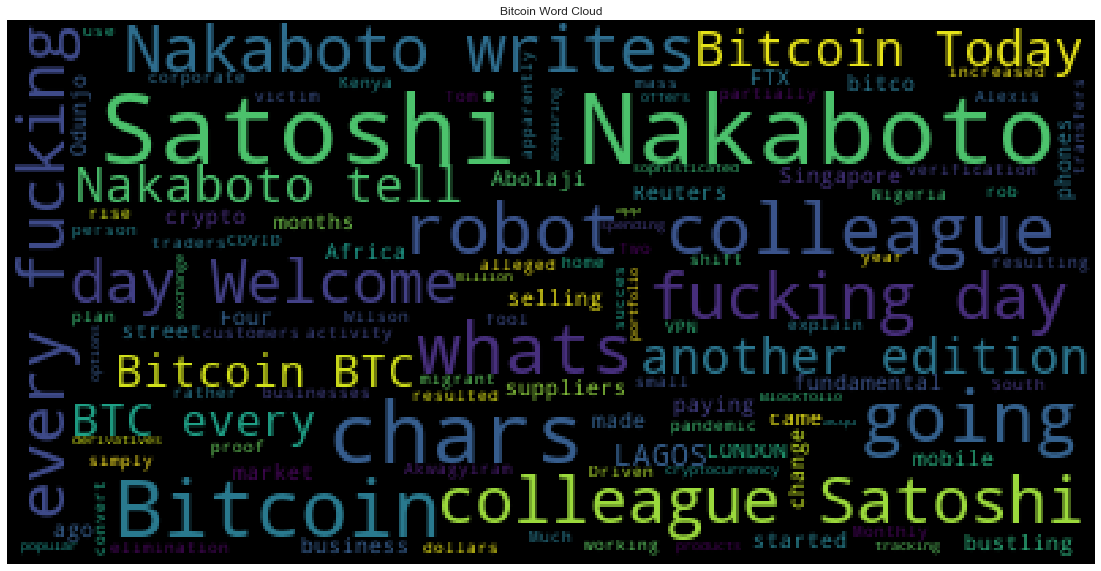

In [24]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(bitcoin_text)
plt.title('Bitcoin Word Cloud')
plt.axis(False)
plt.imshow(wc)

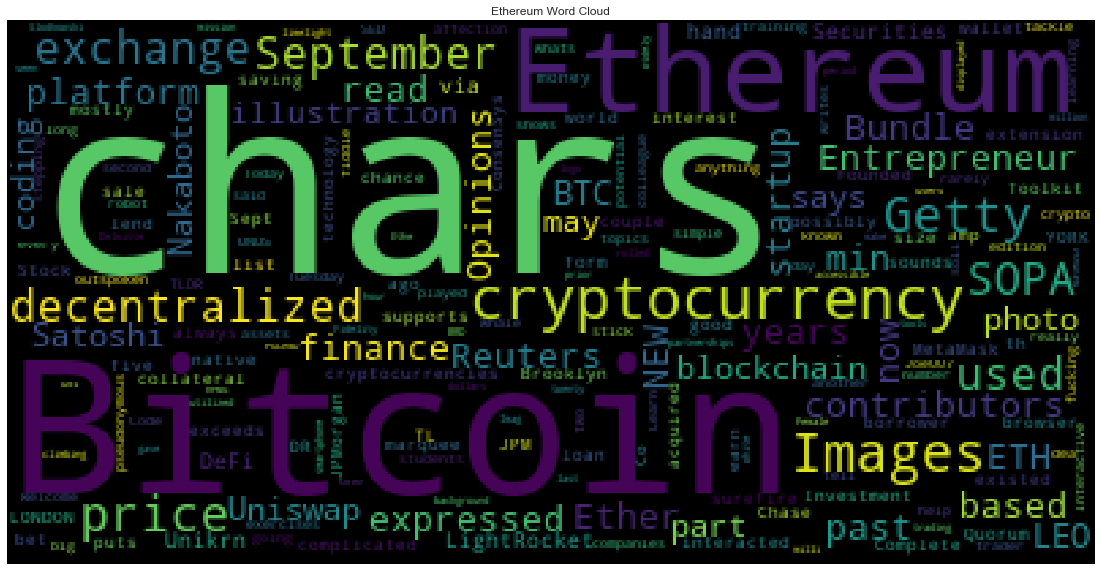

In [25]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(ethereum_text)
plt.title('Ethereum Word Cloud')
plt.axis(False)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [31]:
import spacy
from spacy import displacy

In [32]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [33]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [34]:
# Concatenate all of the bitcoin text together
bitcoin_articles = bitcoin_df["text"].str.cat()

In [49]:
# Run the NER processor on all of the text
doc = nlp(bitcoin_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"
displacy.render(doc, style='ent')

In [43]:
# Render the visualization
for ent in doc.ents:
    print(ent)

the past couple of years
The Complete Stock and Cryptocurrency Investment Toolkit Bundle
29.46
Sept. 7
97%
18, 2020
6 min
five years ago
Ethereum
ETH
Reuters
about 20%
YORK
Reuters
Brooklyn
ConsenSys
JPMorgan Chase &amp
Quorum
Tuesday
Bitcoin
BTC
two
UNUS SED LEO
LEO
Satoshi Nakaboto
Bitcoin
Bitcoin
Today
Satoshi Nakaboto
Bitcoin
second
one
bitcoin
more than 10%
24-hour
chars]$100 million
Deloitte
KPMG
Fidelity
$100 milli
Uniswap
400
UNI
September 1
Ethereum
Mateusz Slodkowski/
twenty dollars
May
bitcoin
DeFi
DeFi
Bitcoin
Bitcoin
as high as $12,086
Ethereum (ETH
chars]The Securities and Exchange Commission
Unikrn
Unikrn
UnikoinGold
16, 2020
6 min
the past few months
working dynamics


In [42]:
# List all Entities
entities = [ent.text for ent in doc.ents if ent.label_ in ["GPE", "ORG", "GPE", "EVE"]]
entities

['The Complete Stock and Cryptocurrency Investment Toolkit Bundle',
 'Ethereum',
 'ETH',
 'Reuters',
 'Reuters',
 'Brooklyn',
 'ConsenSys',
 'JPMorgan Chase &amp',
 'Bitcoin',
 'BTC',
 'UNUS SED LEO',
 'LEO',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'bitcoin',
 'Deloitte',
 'KPMG',
 'Fidelity',
 'Uniswap',
 'UNI',
 'Ethereum',
 'bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Ethereum (ETH',
 'chars]The Securities and Exchange Commission',
 'Unikrn',
 'Unikrn',
 'UnikoinGold',
 'working dynamics']

---

## Ethereum NER

In [38]:
# Concatenate all of the bitcoin text together
ethereum_articles = ethereum_df["text"].str.cat()

In [48]:
# Run the NER processor on all of the text
doc = nlp(ethereum_text)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"
displacy.render(doc, style='ent')

In [40]:
# Render the visualization
for ent in doc.ents:
    print(ent)

the past couple of years
The Complete Stock and Cryptocurrency Investment Toolkit Bundle
29.46
Sept. 7
97%
18, 2020
6 min
five years ago
Ethereum
ETH
Reuters
about 20%
YORK
Reuters
Brooklyn
ConsenSys
JPMorgan Chase &amp
Quorum
Tuesday
Bitcoin
BTC
two
UNUS SED LEO
LEO
Satoshi Nakaboto
Bitcoin
Bitcoin
Today
Satoshi Nakaboto
Bitcoin
second
one
bitcoin
more than 10%
24-hour
chars]$100 million
Deloitte
KPMG
Fidelity
$100 milli
Uniswap
400
UNI
September 1
Ethereum
Mateusz Slodkowski/
twenty dollars
May
bitcoin
DeFi
DeFi
Bitcoin
Bitcoin
as high as $12,086
Ethereum (ETH
chars]The Securities and Exchange Commission
Unikrn
Unikrn
UnikoinGold
16, 2020
6 min
the past few months
working dynamics


In [41]:
# List all Entities
entities = [ent.text for ent in doc.ents if ent.label_ in ["GPE", "ORG", "GPE", "EVE"]]
entities

['The Complete Stock and Cryptocurrency Investment Toolkit Bundle',
 'Ethereum',
 'ETH',
 'Reuters',
 'Reuters',
 'Brooklyn',
 'ConsenSys',
 'JPMorgan Chase &amp',
 'Bitcoin',
 'BTC',
 'UNUS SED LEO',
 'LEO',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Bitcoin',
 'bitcoin',
 'Deloitte',
 'KPMG',
 'Fidelity',
 'Uniswap',
 'UNI',
 'Ethereum',
 'bitcoin',
 'Bitcoin',
 'Bitcoin',
 'Ethereum (ETH',
 'chars]The Securities and Exchange Commission',
 'Unikrn',
 'Unikrn',
 'UnikoinGold',
 'working dynamics']